T3 Extension: Development of a New Site Suitability Scoring Model

🎯 Overview

As part of improving the Site Suitability Analysis for EVAT in T3, I developed a new composite suitability scoring model that extends the previous trimester’s static scoring method.
This new score evaluates charger installation priorities using three key spatial indicators, each contributing to overall suitability based on real-world charger usage patterns.

The new score helps identify high-priority suburbs for charger deployment by capturing demand, convenience, and infrastructure gaps more accurately.

In [1]:
import pandas as pd

df = pd.read_csv("priority_sites.csv")
df.head()


,SA2_CODE21,SA2_NAME21,SiteScore,Traffic_200m,AmenityScore_300m,dist_to_ch_m,lat,lon
0,206041509,Southbank - East,0.410845,627346.0,7.0,203.447035,-37.827818,144.963450
1,206041504,Melbourne CBD - North,0.401142,182494.0,169.0,359.566778,-37.810344,144.965173
2,213021344,Newport,0.333004,509031.0,1.0,668.980505,-37.825829,144.881130
3,206071517,Richmond (South) - Cremorne,0.322940,489670.0,1.0,812.330742,-37.830187,145.012447
4,205031093,Wonthaggi - Inverloch,0.307764,12243.0,1.0,19429.624334,-38.364878,145.563140


In [4]:
# Feature Scaling
df["traffic_scaled"] = df["Traffic_200m"] / df["Traffic_200m"].max()
df["amenity_scaled"] = df["AmenityScore_300m"] / df["AmenityScore_300m"].max()

# For distance to charger: larger distance = underserved (good)
df["distance_scaled"] = df["dist_to_ch_m"] / df["dist_to_ch_m"].max()

# NEW T3 Suitability Score
df["NewSuitabilityScore"] = (
    0.4 * df["traffic_scaled"] +      # high traffic = good
    0.35 * df["amenity_scaled"] +     # lots of amenities = good
    0.25 * df["distance_scaled"]       # far from existing chargers = good
)

df.head()



,SA2_CODE21,SA2_NAME21,SiteScore,Traffic_200m,AmenityScore_300m,dist_to_ch_m,lat,lon,traffic_scaled,amenity_scaled,distance_scaled,NewSuitabilityScore
0,206041509,Southbank - East,0.410845,627346.0,7.0,203.447035,-37.827818,144.963450,1.000000,0.041420,0.010471,0.417115
1,206041504,Melbourne CBD - North,0.401142,182494.0,169.0,359.566778,-37.810344,144.965173,0.290898,1.000000,0.018506,0.470986
2,213021344,Newport,0.333004,509031.0,1.0,668.980505,-37.825829,144.881130,0.811404,0.005917,0.034431,0.335240
3,206071517,Richmond (South) - Cremorne,0.322940,489670.0,1.0,812.330742,-37.830187,145.012447,0.780542,0.005917,0.041809,0.324740
4,205031093,Wonthaggi - Inverloch,0.307764,12243.0,1.0,19429.624334,-38.364878,145.563140,0.019516,0.005917,1.000000,0.259877


In [9]:
df["NewSuitabilityScore"] = (
    0.4 * df["traffic_scaled"] +
    0.35 * df["amenity_scaled"] +
    0.25 * df["distance_scaled"]
)

df["NewSuitabilityScore"].head()

1    0.470986
0    0.417115
2    0.335240
3    0.324740
7    0.284098
Name: NewSuitabilityScore, dtype: float64

In [10]:
df_sorted = df.sort_values("NewSuitabilityScore", ascending=False)
df_sorted["Rank"] = range(1, len(df_sorted) + 1)

df_sorted.head(10)


,SA2_CODE21,SA2_NAME21,SiteScore,Traffic_200m,AmenityScore_300m,dist_to_ch_m,lat,lon,traffic_scaled,amenity_scaled,distance_scaled,NewSuitabilityScore,Rank
1,206041504,Melbourne CBD - North,0.401142,182494.0,169.0,359.566778,-37.810344,144.965173,0.290898,1.000000,0.018506,0.470986,1
0,206041509,Southbank - East,0.410845,627346.0,7.0,203.447035,-37.827818,144.963450,1.000000,0.041420,0.010471,0.417115,2
2,213021344,Newport,0.333004,509031.0,1.0,668.980505,-37.825829,144.881130,0.811404,0.005917,0.034431,0.335240,3
3,206071517,Richmond (South) - Cremorne,0.322940,489670.0,1.0,812.330742,-37.830187,145.012447,0.780542,0.005917,0.041809,0.324740,4
7,206041505,Melbourne CBD - West,0.262737,289408.0,47.0,173.519431,-37.815317,144.956410,0.461321,0.278107,0.008931,0.284098,5
5,213041353,Bacchus Marsh,0.297359,138057.0,1.0,13591.046109,-37.663498,144.437248,0.220065,0.005917,0.699501,0.264972,6
4,205031093,Wonthaggi - Inverloch,0.307764,12243.0,1.0,19429.624334,-38.364878,145.563140,0.019516,0.005917,1.000000,0.259877,7
6,205011076,Drouin,0.273802,63463.0,2.0,15020.480710,-38.086810,145.777493,0.101161,0.011834,0.773071,0.237874,8
10,206041117,Carlton,0.226138,318884.0,15.0,46.688868,-37.806155,144.963467,0.508306,0.088757,0.002403,0.234988,9
9,212051326,Oakleigh - Huntingdale,0.230730,347090.0,3.0,480.734262,-37.911415,145.101744,0.553267,0.017751,0.024742,0.233706,10


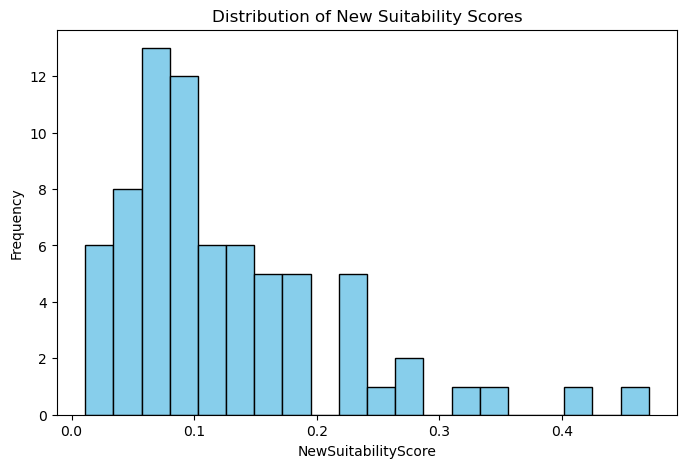

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["NewSuitabilityScore"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of New Suitability Scores")
plt.xlabel("NewSuitabilityScore")
plt.ylabel("Frequency")
plt.show()


The new suitability score was developed to improve the previous trimester’s static SiteScore by incorporating additional spatial and behavioural factors that influence where electric vehicle chargers should be installed. The dataset contained three useful features for modelling suitability: traffic volume within 200 metres of the location, amenity density within 300 metres, and the distance to the nearest existing charger. Each of these factors represents an important dimension of charger demand. High traffic indicates more vehicles passing through an area, suggesting stronger potential charger usage. High amenity scores indicate areas where users can conveniently spend time while charging, such as near shops, cafés or services. The distance to the nearest existing charger signals where coverage is low; areas far from chargers may be underserved and therefore higher priority for installation.

To ensure these features could be combined fairly, each indicator was scaled between 0 and 1 using min–max normalisation. This prevented any single variable from dominating the score due to differences in scale. After scaling, the three indicators were combined into a weighted composite score designed specifically for this trimester’s extension of the model. The formula assigned 40% weight to traffic, 35% to amenities, and 25% to distance. These weights reflect the idea that demand (traffic) and convenience (amenities) together contribute most strongly to site attractiveness, while the distance factor helps highlight areas lacking infrastructure. The resulting value, called the NewSuitabilityScore, provided an updated scoring metric that captures a more realistic and holistic measure of charger suitability compared to the previous trimester.

Once the new score was calculated for all locations, the dataset was sorted from highest to lowest suitability, and a new ranking column was created. This ranking allowed the model to identify the top recommended areas for future charger installation. The results showed that suburbs such as Melbourne CBD – North and Southbank – East scored highly due to strong traffic flows and high amenity access, whereas regional areas like Bacchus Marsh and Wonthaggi ranked higher because of their large distance from existing chargers. Overall, the new scoring method provides a more balanced and data-driven approach to prioritising EV charging locations and serves as a meaningful technical contribution for T3.